In [13]:
!pip install rasterio

In [14]:
import numpy as np
A=([1,7,7,3],
   [0.14,1,7,7],
   [0.14,0.20,1,7],
   [0.33,0.14,0.14,1])
 
print(A)
     

([1, 7, 7, 3], [0.14, 1, 7, 7], [0.14, 0.2, 1, 7], [0.33, 0.14, 0.14, 1])


In [15]:
B=np.array(A)
values, vectores=np.linalg.eig(B) # Función para calcular los valores y vectores propios
vector_norm=vectores/np.linalg.norm(vectores, ord=1) # normalización de los vectores

print(' valores propios',values)
     

 valores propios [ 5.65307921+0.j         -0.08034148+2.96457929j -0.08034148-2.96457929j
 -1.49239626+0.j        ]


In [16]:

print('esto son los vectores propios', vectores)

esto son los vectores propios [[-0.89895614+0.j          0.90501431+0.j          0.90501431-0.j
   0.8155536 +0.j        ]
 [-0.39745213+0.j          0.03534393+0.37489182j  0.03534393-0.37489182j
  -0.5089693 +0.j        ]
 [-0.1655242 +0.j         -0.1695385 +0.04685361j -0.1695385 -0.04685361j
   0.25884247+0.j        ]
 [-0.08069328+0.j         -0.01278751-0.0897438j  -0.01278751+0.0897438j
  -0.09393167+0.j        ]]


In [17]:
print('vectores propios normalizados',vector_norm)

vectores propios normalizados [[-0.53595524+0.j          0.53956711+0.j          0.53956711-0.j
   0.48623087+0.j        ]
 [-0.23695989+0.j          0.02107196+0.2235095j   0.02107196-0.2235095j
  -0.30344613+0.j        ]
 [-0.09868509+0.j         -0.1010784 +0.027934j   -0.1010784 -0.027934j
   0.15432119+0.j        ]
 [-0.04810912+0.j         -0.00762388-0.05350501j -0.00762388+0.05350501j
  -0.05600181+0.j        ]]


In [18]:

w=vector_norm[:,0]*-1
print(w)

[0.53595524-0.j 0.23695989-0.j 0.09868509-0.j 0.04810912-0.j]


## Pesos

#### Pendiente: 0.536
#### Aspecto: 0.237
#### Flujo acumulado: 0.098
#### Geologia: 0.05


In [19]:

CI=(values[0]-len(values))/(len(values)-1)

CR= CI/1.24

print(CR)#el análisis esta OK

(0.44437613239586293+0j)


# Metodo combinado

In [20]:
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns #libreria para graficar
from pandas import DataFrame
import statsmodels.graphics.api as smg #libreria de estadistica

(19705,)

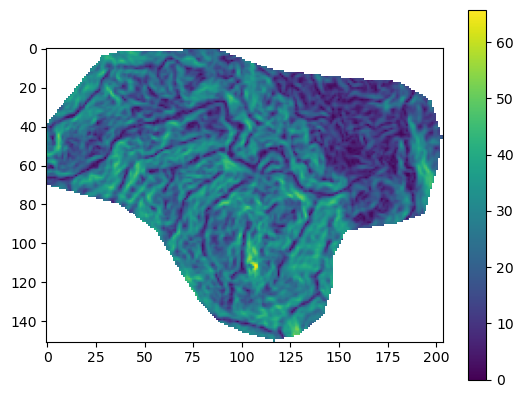

In [33]:
raster = rio.open('https://github.com/jegomezc/Cartografia-Geotecnica/blob/main/VARIABLES/pendiente1.tif?raw=true')
pendiente=raster.read(1)
pendiente=np.where(pendiente<-100,np.nan,pendiente)
pendiente_vector=pendiente.ravel()
pendiente_vector_MenM=pendiente_vector[~np.isnan(pendiente_vector)]
plt.imshow(pendiente)
plt.colorbar()
pendiente_vector_MenM.shape

[0.1 0.3 0.4 0.5 0.8 nan]


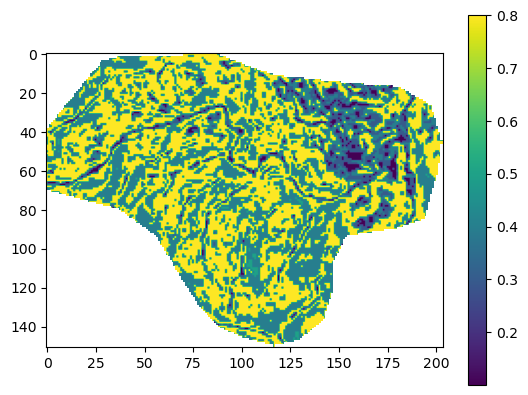

In [34]:
pendiente_re=np.where ( (np.logical_and (pendiente>=0, pendiente<5 )),0.1,pendiente );
pendiente_re=np.where ( (np.logical_and (pendiente_re>=5, pendiente_re<10 )),0.3,pendiente_re);
pendiente_re=np.where ( (np.logical_and (pendiente_re>=10, pendiente_re<15 )),0.4,pendiente_re);
pendiente_re=np.where ( (np.logical_and (pendiente_re>=15, pendiente_re<30 )),0.8,pendiente_re);
pendiente_re=np.where ( (np.logical_and (pendiente_re>=30, pendiente_re<45 )),0.4,pendiente_re);
pendiente_re=np.where ( (np.logical_and (pendiente_re>=45, pendiente_re<47 )),0.4,pendiente_re);
pendiente_re=np.where ( pendiente_re>=47,0.5,pendiente_re);
print(np.unique(pendiente_re));
plt.imshow(pendiente_re);
plt.colorbar();
     

(19705,)

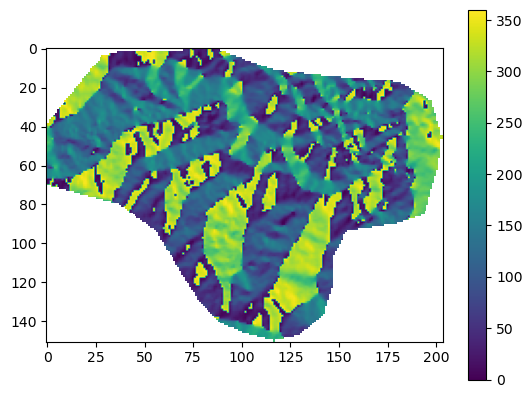

In [35]:
raster = rio.open('https://github.com/jegomezc/Cartografia-Geotecnica/blob/main/VARIABLES/aspecto1.tif?raw=true')
aspecto=raster.read(1)
aspecto=np.where(aspecto<-2,np.nan,aspecto)
aspecto=np.where(aspecto<0,0,aspecto)
aspecto_vector=aspecto.ravel()
aspecto_vector_MenM=aspecto_vector[~np.isnan(aspecto_vector)]
plt.imshow(aspecto)
plt.colorbar()
aspecto_vector_MenM.shape
     

[0.1 0.2 0.3 0.7 nan]


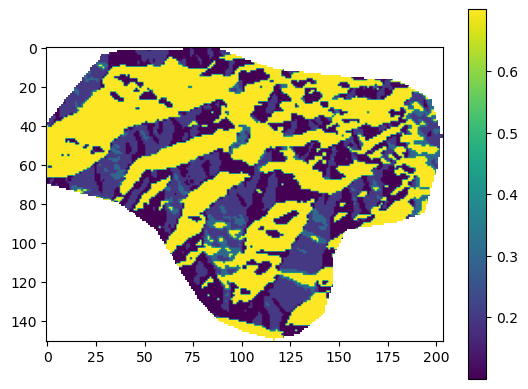

In [36]:
aspecto_re=np.where ( (np.logical_and (aspecto>=0, aspecto<75 )),0.1,aspecto );
aspecto_re=np.where ( (np.logical_and (aspecto_re>=75, aspecto_re<180 )),0.7,aspecto_re);
aspecto_re=np.where ( (np.logical_and (aspecto_re>=180, aspecto_re<275 )),0.7,aspecto_re);
aspecto_re=np.where ( (np.logical_and (aspecto_re>=275, aspecto_re<300 )),0.3,aspecto_re);
aspecto_re=np.where ( aspecto_re>=300,0.2,aspecto_re);
print(np.unique(aspecto_re));
plt.imshow(aspecto_re);
plt.colorbar();
     

(19705,)

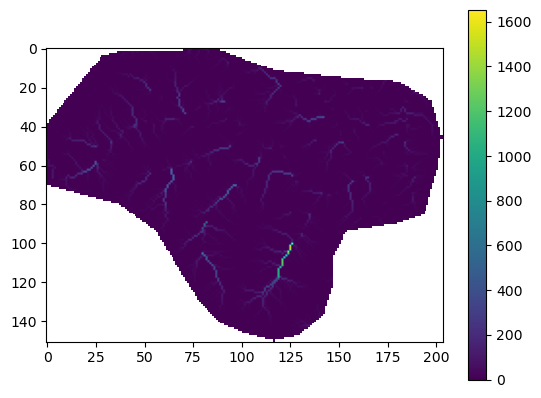

In [37]:
raster = rio.open('https://github.com/jegomezc/Cartografia-Geotecnica/blob/main/Base%20fisica/FlowAcc_final1.tif?raw=true')
flow_acc=raster.read(1)
flow_acc=np.where(flow_acc<-100,np.nan,flow_acc)
flow_acc_vector=flow_acc.ravel()
flow_acc_vector_MenM=flow_acc_vector[~np.isnan(flow_acc_vector)]
plt.imshow(flow_acc)
plt.colorbar()
flow_acc_vector_MenM.shape

[0.1 0.2 0.7 nan]


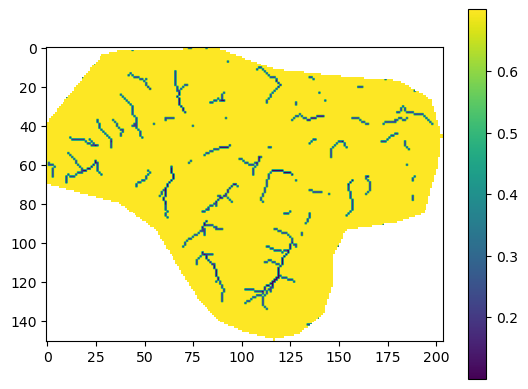

In [38]:
flow_acc_re=np.where ( (np.logical_and (flow_acc>=0,flow_acc<62.5 )),0.7,flow_acc );
flow_acc_re=np.where ( (np.logical_and (flow_acc_re>=62.5, flow_acc_re<250 )),0.2,flow_acc_re);
flow_acc_re=np.where ( (np.logical_and (flow_acc_re>=250, flow_acc_re<750 )),0.1,flow_acc_re);
flow_acc_re=np.where ( (np.logical_and (flow_acc_re>=750, flow_acc_re<1250 )),0.1,flow_acc_re);
flow_acc_re=np.where ( flow_acc_re>=1250,0.1,flow_acc_re);
print(np.unique(flow_acc_re));
plt.imshow(flow_acc_re);
plt.colorbar();

(19705,)

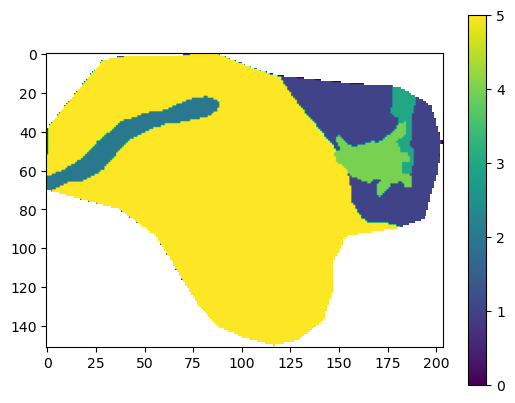

In [39]:
raster = rio.open('https://github.com/jegomezc/Cartografia-Geotecnica/blob/main/VARIABLES/Geolo_final1.tif?raw=true')
geologia=raster.read(1)
geologia=np.where(geologia>=10,np.nan,geologia)
geologia_vector=geologia.ravel()
geologia_vector_MenM=geologia_vector[~np.isnan(geologia_vector)]
plt.imshow(geologia)
plt.colorbar()
geologia_vector_MenM.shape

[0.1 0.3 0.7 nan]


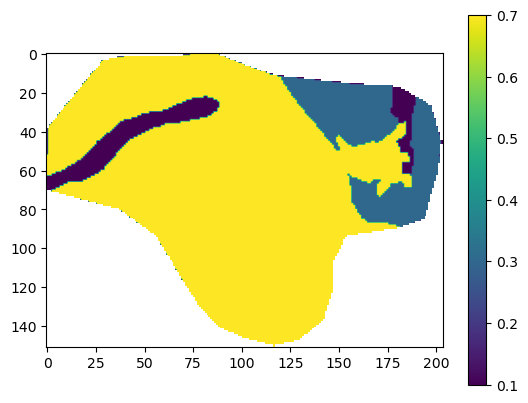

In [40]:
geologia_re=np.where ( (np.logical_and (geologia>=0,geologia<0.5 )),0.1,geologia );
geologia_re=np.where ( (np.logical_and (geologia_re>=0.5, geologia_re<1 )),0.5,geologia_re);
geologia_re=np.where ( (np.logical_and (geologia_re>=1, geologia_re<2 )),0.3,geologia_re);
geologia_re=np.where ( (np.logical_and (geologia_re>=2, geologia_re<4 )),0.1,geologia_re);
geologia_re=np.where ( geologia_re>=4,0.7,geologia_re);
print(np.unique(geologia_re));
plt.imshow(geologia_re);
plt.colorbar();

In [41]:
print(w[0],w[1],w[2],w[3])

(0.5359552431754474-0j) (0.2369598926001358-0j) (0.09868508640549987-0j) (0.04810911593912178-0j)


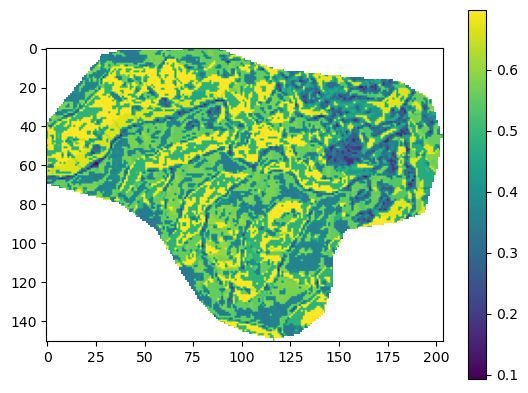

In [43]:
IS=0.536*pendiente_re+0.237*aspecto_re+0.098*flow_acc_re+0.05*geologia_re
plt.imshow(IS);
plt.colorbar();

In [44]:
meta=raster.profile
raster_transform = meta['transform']
raster_crs = meta['crs']

with rio.open('IS.TIF', 'w', 
              driver='Gtiff',height=aspecto.shape[0],width=aspecto.shape[1],count=1,
              dtype='float64',nodata=-999,crs=raster_crs,transform=raster_transform) as dst:
    dst.write(IS,1);